In [12]:
import numpy as np
import pandas as pd
import time
import random
import os.path
from os import path
from subprocess import Popen, PIPE, TimeoutExpired
import random
from random import randrange
import concurrent.futures

In [32]:
control_points_coordinates = np.array([           
[0.7,109],
[0.5,110],
[0.357,101],
[0.174,118],
[0.025,81],               
[0.00011,25],      
[0,-25],
[0.1,-42],
[0.2,-10],
[0.36, 0],
[0.5,-6.3],
[0.7,-5],
]) 

In [33]:
def encode_x_coord(x_control_point_coord):
    """
    Takes an array of control points and returns a binary array 
    """
    bin_whole_num = np.binary_repr(int(x_control_point_coord*100), width=8)
    list1 = []
    list1[:0] = bin_whole_num
    resb = [eval(i) for i in list1]
    bin_array = np.array(resb)
    return bin_array

def encode_y_coord(y_control_point_coord):
    bin_whole_num = np.binary_repr(int(y_control_point_coord), width=8)
    list1 = []
    list1[:0] = bin_whole_num
    resb = [eval(i) for i in list1]
    bin_array = np.array(resb)
    return bin_array

def encode_control_points(control_points):
    """
    This function takes a 12,2 Control Point array and returns a 192 encoded binary array
    """
    #Loop to encode x coordinates of control points
    binx_coords = np.random.randint(2, size=(12,8))
    for i in range(0,12):
        binx_coords[i] = encode_x_coord(control_points[i][0])
    binx_coords

    #Loop to decode binary x coordinates
#     decoded_xcoords = np.empty([12, 2], dtype = float)
#     for i in range(0,12):
#         decoded_xcoords[i][0] = decode_x_coord(binx_coords[i]) 
#     decoded_xcoords
    # decode_x_coord(binx_coords[0]) 
    
    #Loop to encode x coordinates of control points
    biny_coords = np.random.randint(2, size=(12,8))
    for i in range(0,12):
        biny_coords[i] = encode_y_coord(abs(control_points[i][1]))
    
#     decoded_ycoords = np.empty([12, 2], dtype = float)
#     for i in range(0,12):
#         decoded_ycoords[i][1] = decode_y_coord(biny_coords[i]) 
#     decoded_ycoords
    binary_array = np.append(binx_coords,biny_coords)
    return binary_array

In [34]:
encode_control_points(control_points_coordinates)

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [35]:
airfoil_seed = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])


In [29]:
def get_control_points(binary_array):
    """
    This function takes a 192 binary array and returns a 1D 24 control points list which house the x,y control point coords 
    The control points array is made up of 12 X-coodinate control points followed by 12 Y-coordinate control points.
    The first six coordinates of each set represent the upper surface control points
    The list order is 0,1,2,3,4,5,11,10,9,8,7,6,12,13,14,15,16,17,23,22,21,20,19,18
    """
    value_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    # num = np.dot(value_array, 2**np.arange(len(value_array)-1, -1, -1))
    # decimal = num/100

    # decoded_coords = np.empty([12, 2], dtype = float)
    j = 0
    k = 8
    for i in range(0,12):
        value_array[i] = (np.dot(binary_array[j:k], 2**np.arange(len(binary_array[j:k])-1, -1, -1)))/100
    #     print(i,j,k)
        j+=8
        k+=8

    n = 96
    o = 104
    for m in range(12,24):
        value_array[m] = (np.dot(binary_array[n:o], 2**np.arange(len(binary_array[n:o])-1, -1, -1)))
#         print(m,n,o)
        n+=8
        o+=8
    return value_array

In [46]:
def generate_Bezier_Curve(val_a, val_b, val_c, val_d, val_e, val_f, val_g, val_h, val_u):
    """
    Function to generate Bezier Curves using the provided constants - 8 constants for 7th Order
    """
    a = float(val_a)
    b = float(val_b)
    c = float(val_c)
    d = float(val_d)
    e = float(val_e)
    f = float(val_f)
    g = float(val_g)
    h = float(val_h)
    u = float(val_u)

    member0 = ((1.0-u)**7.0)*a
    member1 = ((1.0-u)**6.0)*(u**1)*b*7.0
    member2 = ((1.0-u)**5.0)*(u**2)*c*21.0
    member3 = ((1.0-u)**4.0)*(u**3)*d*35.0
    member4 = ((1.0-u)**3.0)*(u**4)*e*35.0
    member5 = ((1.0-u)**2.0)*(u**5)*f*21.0
    member6 = ((1.0-u)**1.0)*(u**6)*g*7.0
    member7 = ((1.0-u)**0.0)*(u**7)*h

    P = member0 + member1 + member2 + member3 + member4 + member5 + member6 + member7

    return P

In [47]:
def solve():
    # run xfoil simulation on the generated airfoil profile
 # save the airfoil profile to a txt file to be used by xfoil
    if path.exists('res.txt'):
        os.remove('res.txt')
    
    os.startfile("start_xfoil.bat")

    time_to_wait = 7
    time_counter = 0
    while not os.path.exists("res.txt"):
        time.sleep(1)
        time_counter += 1
#         print(time_counter-1)
        if time_counter > time_to_wait:
            fitness = 0.0
            %run kill_script
            break
        while os.path.exists("res.txt"):
            time.sleep(1)
            time_counter += 1
            with open("res.txt", 'r') as f:
                
                lines = f.readlines()
                if len(lines) == 22:
                    results = {
                            'alpha': [],
                            'cl': [],
                            'cd': [],
                            'cm': [],
                            'cdp': [],
                            # 'xtr_top': [],
                            # 'xtr_bot': [],
                            # 'itr_top': [],
                            # 'itr_bot': [],
                        }

                        # read the xfoil output file

                    lines = [line for line in lines if line.strip() != '']

                    for line in lines[7:]: # skip the first 7 lines of the file
                        #split the line into a list

                        line = line.split()

                        # check if there is any non numeric elements in the list

                        # get the values
                        try:
                            results['alpha'].append(float(line[0]))
                            results['cl'].append(float(line[1]))
                            results['cd'].append(float(line[2]))
                            results['cdp'].append(float(line[3]))
                            results['cm'].append(float(line[4]))
                        except ValueError:
                            continue
                                # results['xtr_top'].append(float(line[5]))
                                # results['xtr_bot'].append(float(line[6]))
                                # results['itr_top'].append(float(line[7]))
                                # results['itr_bot'].append(float(line[8]))



                    # clean up the files

                    lift = np.array(results['cl'])
                    drag = np.array(results['cd'])
                    coeffs = lift/drag
                    
                    SG6043_fitness = np.array([115.922619, 147.4285714, 148.7848101, 121.3309025, 92.73074475, 73.5483871, 56.83816014, 41.41044061, 28.41207988, 18.57112069])
                    target_fitness = SG6043_fitness*1.3

                    error = np.absolute(target_fitness-coeffs)
#                     fitness = np.sum(error)
                    fitness = np.sum(coeffs[:7])
                    break
                    
                elif time_counter > time_to_wait:
                    fitness = 0.0
                    %run kill_script
                    break
                    
    return fitness


In [48]:
#LOOP 3 NEW

def get_solution_coordinates(solution):
    """
    This function takes a solution and returns its airfoil coordinates. num_coords specifies how many x,y pairs you prefer.
    """
    #Get airfoil coordinates from possible solution control points
    Value = solution
    Ux1 = 1.0
    Ux2 = Value[0]
    Ux3 = Value[1]
    Ux4 = Value[2]
    Ux5 = Value[3]
    Ux6 = Value[4]
    Ux7 = Value[5]
    Ux8 = 0.0

    # Lower Surface x Control Points
    Lx1 = 1.0
    Lx2 = Value[11]
    Lx3 = Value[10]
    Lx4 = Value[9]
    Lx5 = Value[8]
    Lx6 = Value[7]
    Lx7 = Value[6]
    Lx8 = 0.0
    
    # Upper Surface y Control Points
    Uy1 = 0.0
    Uy2 = Value[12]
    Uy3 = Value[13]
    Uy4 = Value[14]
    Uy5 = Value[15]
    Uy6 = Value[16]
    Uy7 = Value[17]
    Uy8 = 0.0


    # Lower Surface y Control Points
    Ly1 = 0.0
    Ly2 = -Value[23]
    Ly3 = -Value[22]
    Ly4 = -Value[21]
    Ly5 = -Value[20]
    Ly6 = -Value[19]
    Ly7 = -Value[18]
    Ly8 = 0.0

    xU = []
    yU = []
    xL = []
    yL = []

#     data = {'UpperX': [],'UpperY': []}
    
#     dataframe = pd.DataFrame(data)
    num_coords = 40
    u_min_upper = 1/(num_coords)
    u_max_upper = 1 + u_min_upper
    
    #Convert upper curve control points to airfoil coordinates and append to the dataframe
    for i in np.arange(0,u_max_upper,u_min_upper):
        u = float(i)
        x_val = generate_Bezier_Curve(Ux1, Ux2, Ux3, Ux4, Ux5, Ux6, Ux7, Ux8, u)
        y_val = generate_Bezier_Curve(Uy1, Uy2, Uy3, Uy4, Uy5, Uy6, Uy7, Uy8, u) / 1000
        xU.append(x_val)
        yU.append(y_val)
#     dataframe['UpperX'] = xU
#     dataframe['UpperY'] = yU
    
    #Convert lower curve control points to airfoil coordinates and append to the dataframe
    for i in np.arange(1.0,-u_min_upper,-u_min_upper):
        u = float(i)
        x_val = generate_Bezier_Curve(Lx1, Lx2, Lx3, Lx4, Lx5, Lx6, Lx7, Lx8, u)
        y_val = generate_Bezier_Curve(Ly1, Ly2, Ly3, Ly4, Ly5, Ly6, Ly7, Ly8, u) / 1000
        xL.append(x_val)
        yL.append(y_val)

    x = pd.concat([pd.Series(xU), pd.Series(xL)], ignore_index=True)
    y = pd.concat([pd.Series(yU), pd.Series(yL)], ignore_index=True)

    df = pd.DataFrame({"X": x ,"Y": y})
    np.savetxt(r'af.dat', df.values, fmt='%1.6f')
  
    fitness = solve()
    
    return fitness

In [49]:
Value = get_control_points(seed)
fitness = get_solution_coordinates(Value)
fitness

600.6068759929258

In [50]:
# varbound=np.random.randint(2, size=(192,2))
# # vartype=np.array([['real'],['real'],['real'],['real'],['real']])

# max_num_iteration = 10
# chromosome_length = 192
# population_size = 5
# current_generation = np.random.randint((varbound[0][1])+1, size=(population_size,varbound.shape[0]))
# current_generation[1]
# fitness = get_solution_coordinates(get_control_points(current_generation[1]))
# fitness

0.0

In [62]:
class ga():
    """
    This class runs a genetic algorithm
    """
    def __init__(self, Generation, Chromosome_Length, Population_Size, Mutation_Rate, Crossover_Rate, varbound, seed, function=None):
        self.number_of_generations = Generation
        self.length_of_chromosome = Chromosome_Length
        self.size_of_population = Population_Size
        self.mutation_rate = Mutation_Rate
        self.crossover_rate = Crossover_Rate
        self.varbound = varbound
        self.seed = seed
        self.fitness_func = function
#         self.maximum_allowable_thickness = Maximum_Thickness
#         self.minimum_allowable_thickness = Minimum_Thickness
#         self.maximum_allowable_camber = Maximum_Camber
#         self.minimum_allowable_camber = Minimum_Camber
#         self.bezier_control_point_parameter_check = 0
    
    def generate_random_initialization(self):
        """
        Function to create the first generation of solutions
        """
#         current_generation = np.random.randint(2, size=(size_of_population,length_of_chromosome))
        current_generation = np.random.randint((self.varbound[0][1])+1, size=(self.size_of_population,self.varbound.shape[0]))
        current_generation[0] = self.seed

        return current_generation
    
    def calculate_generation_fitness(self, generation_array):
        """
        This function takes a generation array and returns the generation results
        """
        generation_results = np.empty((0,1))

        
        for x in generation_array:
            self.fitness = self.fitness_func(x)
            generation_results = np.append(generation_results,self.fitness)
        
        return generation_results

    def calculate_fitness_weight_distribution(self, generation_results):
        """
        Function to calculate the weight distributions of each individual's fitness against the sum of all individual's fitness
        """
        self.generation_results = generation_results
        total_fitness = self.generation_results.sum()
        weight_distribution = self.generation_results/total_fitness

        return weight_distribution

    def selection(self, current_generation, weighted_results):
        """
        Function to make a copy of the current_gen and carry out Roulette Wheel Selection based on the provided weighted_fitness_results
        """
        self.current_generation = current_generation
        self.weights = weighted_results
        new_pool = np.copy(self.current_generation)

        for i in range(0,len(self.current_generation)):
            r = np.random.rand()
            acc = 0
            idx = -1
            while acc < r: 
                idx += 1 
                acc += self.weights[idx]
            new_pool[i] = self.current_generation[idx]

        return new_pool

    def crossover(self, new_pool):
        """
        Function to perfom crossover on an array that has gone through Roulette Wheel Selection
        """
        self.new_pool = new_pool
        parent_pool = np.copy(self.new_pool)
        offspring_pool = np.copy(self.new_pool)
        CR = self.crossover_rate

        # The range starts from 1 to preserve best solution in zeroth position of the current_gen - pop[0]
        # The range ends at number_of_generations minus one (e.g. 5 sols means solution pop[1] and pop[3] may have crossover hence our range ends at 4 i.e. [5-1])

        for i in range(1,len(self.current_generation)-1,2): 
            r = np.random.rand()
    #             print("r = ", r)
            if r <= CR:
                crosspos = randrange(self.length_of_chromosome-1) # for each divider i.e. 3 divisions for 4 genes, 4 divisions for 5 genes, X-1 divisions for X genes
    #                 print("crossover_position = ", crosspos)
                for j in range(0,crosspos+1): #from 0 to crossover position
                    offspring_pool[i][j] = parent_pool[i][j]
                    offspring_pool[i+1][j] = parent_pool[i+1][j]
                for k in range(crosspos+1,self.length_of_chromosome): #from crossover position to end of chromosome
                    offspring_pool[i][k] = parent_pool[i+1][k]
                    offspring_pool[i+1][k] = parent_pool[i][k]

        return offspring_pool

    def mutation(self, offspring_pool):
        """
        Function to perform mutation on an array  that has gone through Roulette Wheel Selection and Crossover
        """
        self.offspring_pool = offspring_pool
        mutated_pool = np.copy(self.offspring_pool)

        MR = self.mutation_rate

        for i in range(1,self.size_of_population):
            r1 = np.random.rand()
#                 print("r1 = ", r1 )
            if r1 <= MR:
                for j in range(0,self.length_of_chromosome):
                        r2 = np.random.rand()
#                         print("r2 = ", r2)
                        if r2 <= MR:
#                             print("mutation occured at Individual No: ", i, " and Gene: ", j)
                            mutated_pool[i][j] = 1 - (mutated_pool[i][j])

        return mutated_pool

    def get_best_solution_index(self, fitness_results):
        """
        Function to get the best solution from each generation
        """
        self.fitness_results = fitness_results
        top_solution = self.fitness_results.max()
        result = np.where(self.fitness_results == top_solution)
        top_solution_position = result[0][0]

        return top_solution_position
    
    def get_second_best_solution_index(self, fitness_results):
        """
        Function to get the second best solution from each generation
        """
        self.fitness_results = fitness_results
        copy = np.copy(self.fitness_results)
        copy[::-1].sort() #sorts fitness's in ascending order
        second_best_fitness = copy[1] #get value second best fitness 
        result = np.where(self.fitness_results == second_best_fitness) #find position index for second best fitness
        second_best_position = result[0][0] #get integer value of index
        
        return second_best_position

    def get_best_solution(self,current_gen, top_solution_position):
        """
        Function to create an array which holds the best solution
        """
        self.current_gen = current_gen
        self.top_solution_position = top_solution_position
        best_solution = np.copy(self.current_gen[self.top_solution_position])

        return best_solution
    
    def get_second_best_solution(self,current_gen, second_best_solution_position):
        """
        Fuction to get second best fitness value
        """
        self.current_gen = current_gen
        self.second_best_solution_position = second_best_solution_position
        second_best_solution = np.copy(self.current_gen[self.second_best_solution_position])
        
        return second_best_solution
    
    def seed_next_generation(self, best_solution, second_best_solution, current_gen):
        """
        Function to seed the next generation with the best solution from the previous generation
        """
        self.current_gen = current_gen
        self.best_solution = best_solution
        self.second_best_solution = second_best_solution
        new_gen = np.copy(self.current_gen)
        seed_gen = np.copy(self.current_gen)
        new_gen[0] = self.best_solution
        new_gen[1] = self.second_best_solution
        
        return new_gen
    
    def store_info(self,iteration,best_fitness):
        """
        This function keeps appending data to the store data list
        """
        info = np.array([iteration,best_fitness])
        self.stored_info = np.append(self.stored_info,info)
        return self.stored_info
    
    def plot_info(self,plot_data):
        """
        This plots out the current iteration and best_fitness
        """
#         iteration_info = np.array([0,5,1,11,2,12])
        import matplotlib.pyplot as plt
        
        plt.plot(plot_data[:,0],plot_data[:,1])
        plt.ylabel('fitness')
        plt.xlabel('iterations')
        plt.show()
        
    def run(self):
        start = time.time()
        current_gen = self.generate_random_initialization()
        current_gen[0] = self.seed
        self.stored_info = np.empty((0,1))

        for i in range(0,self.number_of_generations):
            #calculate fitness for entire generation
            fitness_results = self.calculate_generation_fitness(current_gen)
            #calculate the weighted average according to fitness
            weighted_results = self.calculate_fitness_weight_distribution(fitness_results)
            #apply parent selection using Roulette Wheel methods based on weighted fitnesses
            new_pool = self.selection(current_gen, weighted_results)
            #apply crossover if random injection occurs
            xover_offspring = self.crossover(new_pool)
            #apply mutation if random injection occurs
            m_pool = self.mutation(xover_offspring)
            #get the best solution position
            best_solution_position = self.get_best_solution_index(fitness_results)
            #get the best solution fitness
            best_solution = self.get_best_solution(current_gen, best_solution_position)
            #get the second best solution position
            second_best_solution_position = self.get_second_best_solution_index(fitness_results)
            # get the second best solution fitness
            second_best_solution = self.get_second_best_solution(current_gen, second_best_solution_position)
            #store fitness information for plotting
            self.store_info(i,fitness_results.max())
            #seed next generation with best and second best seeds
            current_gen = self.seed_next_generation(best_solution,second_best_solution,m_pool)

        end = time.time()
        total_time = end - start
        elapsed_time = round(total_time,2)
        print("Time Elapsed: ", elapsed_time, " seconds")
        
        #plot iteration no. vs fitness after simulation ends
        plot_data = self.stored_info.reshape(-1,2)
        self.plot_info(plot_data)
        
        return current_gen
    


In [68]:
def airfoil_fucntion(x):
#     x = get_control_points(seed)
    fitness = get_solution_coordinates(get_control_points(x))
    return fitness

In [69]:
seed = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])


Time Elapsed:  111.37  seconds


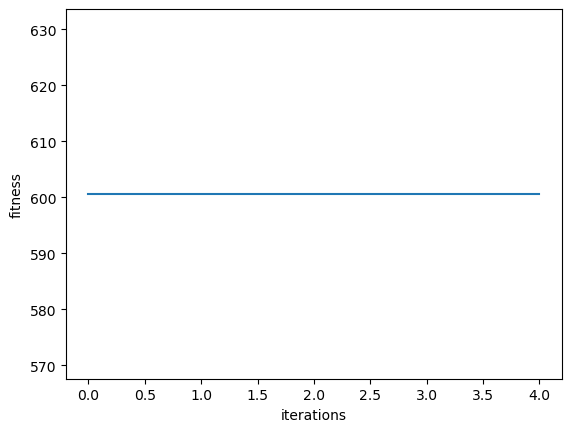

array([[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [72]:
def f(X):
    return get_solution_coordinates(get_control_points(X))
#     return airfoil_function(X)

varbound=np.random.randint(2, size=(192,2))
# vartype=np.array([['real'],['real'],['real'],['real'],['real']])

max_num_iteration = 5
chromosome_length = 192
population_size = 5
mutation_probability = 0.2
crossover_probability = 0.8
seed = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])
# 'elit_ratio': 0.01,
# 'parents_portion': 0.3,
# 'crossover_type':'uniform',
# 'max_iteration_without_improv':None

module = ga(max_num_iteration,chromosome_length,population_size,mutation_probability,crossover_probability,varbound, seed, function=f)
                                               
result = module.run()
result

In [515]:
# varbound[0][1]
# size_of_population = 5

# cgen = np.random.randint(varbound[0][1], size=(self.size_of_population,self.varbound.shape[0]))
# cgen[0] = self.seed

np.random.randint(3, size=(5,5))

array([[1, 1, 2, 0, 1],
       [2, 1, 2, 2, 2],
       [2, 1, 2, 0, 1],
       [0, 1, 2, 2, 2],
       [1, 0, 2, 0, 1]])

In [463]:
total = (result[0]*result[0])
total.sum()

0.0

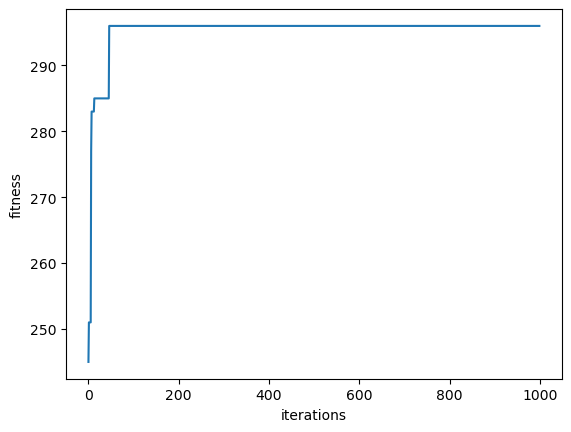

In [464]:
# iteration_info = np.array([0,5,1,11,2,12])
import matplotlib.pyplot as plt
x = np.empty((0,1))
y = np.empty((0,1))
for i in range(0,len(result),2):
    x = np.append(x,int(result[i]))
    y = np.append(y,result[i+1])
plt.plot(x, y)
plt.ylabel('fitness')
plt.xlabel('iterations')
plt.show()

In [ ]:
def run_simulation(self, seed):
    """
    Function 
    """
    start = time.time()
    current_gen = self.generate_random_initialization()
    current_gen[0] = seed

    for i in range(0,self.number_of_generations):
        fitness_results = self.calculate_generation_fitness(current_gen)
        weighted_results = self.calculate_fitness_weight_distribution(fitness_results)
        new_pool = self.selection(current_gen, weighted_results)
        xover_offspring = self.crossover(new_pool)
        m_pool = self.mutation(xover_offspring)
        best_solution_position = self.get_best_solution_index(fitness_results)
        best_solution = self.get_best_solution(current_gen, best_solution_position)
        current_gen = self.seed_next_generation(best_solution,m_pool)

    end = time.time()
    total_time = end - start
    elapsed_time = round(total_time,2)
    print("Time Elapsed: ", elapsed_time, " seconds")
#         self.write_db_to_new_csv(self.directory_2)

    return print("Simulation ended")


In [135]:
current_generation = np.random.randint(2, size=(2,24))
generation_results = np.empty((0,1))
current_generation

array([[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0],
       [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0]])

In [ ]:
generation_results = np.empty((0,1))

In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return get_solution_coordinates(X)

varbound=np.array([[0,1],[0,1],[0,1],[0,1],[0,1],[0,0.0005],[0,1],[0,1],[0,1],[0,1],[0,1],[-0.0005,0],[50,300],[-50,150],[-50,150],[-50,150],[-50,150],[0,100],[-50,150],[-50,150],[-50,150],[-50,150],[-50,150],[-100,0]])

vartype=np.array([['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real']])

algorithm_param = {'max_num_iteration': 10,
                   'population_size':10,
                   'mutation_probability':0.2,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.6,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

module = ga(function=f, dimension=24, variable_type_mixed=vartype, variable_boundaries=varbound,algorithm_parameters=algorithm_param,function_timeout=20.0)
                                               
module.run()

# varbound=np.array([[0.5,1.5],[1,100],[0,1]])
# vartype=np.array([['real'],['int'],['int']])
# model=ga(function=f,dimension=3,variable_type_mixed=vartype,variable_boundaries=varbound)

In [ ]:
solution = np.array([ 8.69233724e-01,  8.07106428e-01,  2.82190985e-01,  4.41444932e-01,
        1.38127847e-01,  1.71511171e-05,  7.96918651e-01,  7.75370645e-01,
        6.31777748e-01,  9.46804749e-02,  6.08660335e-03, -4.61653908e-04,
        8.13899529e+01,  7.78549723e+01,  1.11642076e+02,  1.26563655e+02,
        1.31468542e+02,  1.09848166e+01,  1.17616966e+01,  4.42438451e+01,
       -4.02817685e+01,  5.92416220e+01, -3.83738575e+01, -2.83643579e+01])

In [ ]:
def solve_mes():
    # run xfoil simulation on the generated airfoil profile
 # save the airfoil profile to a txt file to be used by xfoil

    try:
        # run xfoil using subprocess
        p = Popen(["xfoil.exe", "-n", "-p"], shell=True, stdin=PIPE,
                stdout=PIPE, stderr=PIPE)  # run xfoil

        # send commands to xfoil
        # p.stdin.write(b' ')
        p.stdin.write(b'load\n')
        p.stdin.write(b'af.txt\n')
        # p.stdin.write(b'profile.txt\n')
        # bt = command.encode()
        # p.stdin.write(bt)
        p.stdin.write(b'ppar\n')
        p.stdin.write(b'n\n')
        p.stdin.write(b'260\n')
        p.stdin.write(b'\n')
        p.stdin.write(b'\n')
        p.stdin.write(b'oper\n')
        p.stdin.write(b'visc\n')
        p.stdin.write(b'300000\n')
        p.stdin.write(b'iter\n')
        p.stdin.write(b'3000\n')
        p.stdin.write(b'pacc\n')
        p.stdin.write(b'res.txt\n')
        p.stdin.write(b'\n')
        p.stdin.write(b'\n')
        p.stdin.write(b'oper\n')
        p.stdin.write(b'aseq\n')
        p.stdin.write(b'0\n')
        p.stdin.write(b'18\n')
        p.stdin.write(b'1\n')
        p.stdin.write(b'\n')
        p.stdin.write(b'!\n')
        p.stdin.write(b'\n')
        p.stdin.write(b'\n')
        p.stdin.write(b'quit\n')

        # implement a try catch block to handle the timeout error

        output, error = p.communicate(timeout=15)
        # kill the process if it is still running and has not converged
        if p.poll() is None:
            p.kill()
    except TimeoutExpired:
        print('Timeout expired')
        p.kill()    
        return 0.0


    results = {
            'alpha': [],
            'cl': [],
            'cd': [],
            'cm': [],
            'cdp': [],
            # 'xtr_top': [],
            # 'xtr_bot': [],
            # 'itr_top': [],
            # 'itr_bot': [],
        }

        # read the xfoil output file
    if path.exists("res.txt"):
        with open("res.txt", 'r') as f:
            lines = f.readlines()
            # remove empty lines
            lines = [line for line in lines if line.strip() != '']

        for line in lines[7:]: # skip the first 7 lines of the file
            # split the line into a list
            #
            line = line.split()
            # print(line)
            # check if there is any non numeric elements in the list

            # get the values
            try:
                results['alpha'].append(float(line[0]))
                results['cl'].append(float(line[1]))
                results['cd'].append(float(line[2]))
                results['cdp'].append(float(line[3]))
                results['cm'].append(float(line[4]))
            except ValueError:
                continue
                    # results['xtr_top'].append(float(line[5]))
                    # results['xtr_bot'].append(float(line[6]))
                    # results['itr_top'].append(float(line[7]))
                    # results['itr_bot'].append(float(line[8]))

                        
                        
    # clean up the files

    if path.exists('res.txt'):
        os.remove('res.txt')
    if path.exists('res.txt'):
        os.remove('res.txt')
        
    fitness = 0.0
    if results['cd'] == []:
        return fitness
    if len(results['cd']) < 9:
        return fitness
    
    lift = np.array(results['cl'])
    drag = np.array(results['cd'])
    coeffs = lift/drag
    
    lift = np.array(results['cl'])
    drag = np.array(results['cd'])
    coeffs = lift/drag

    SG6043_fitness = np.array([115.922619, 147.4285714, 148.7848101, 121.3309025, 92.73074475, 73.5483871, 56.83816014, 41.41044061, 28.41207988, 18.57112069])
    target_fitness = SG6043_fitness*1.3
    error = np.absolute(target_fitness-coeffs)
    fitness = (np.sum(error))

    return fitness


In [3]:
def sphere(x):
    return sum(x_i ** 2 for x_i in x)

In [2]:
sphere_function([1,2,3])

14

 The best solution found:                                                                           
 [ 1.36557135e-05  1.27234626e-03  3.28549742e-03 -1.34897798e-02
  7.18496460e-04]

 Objective function:
 0.00019490394141412516


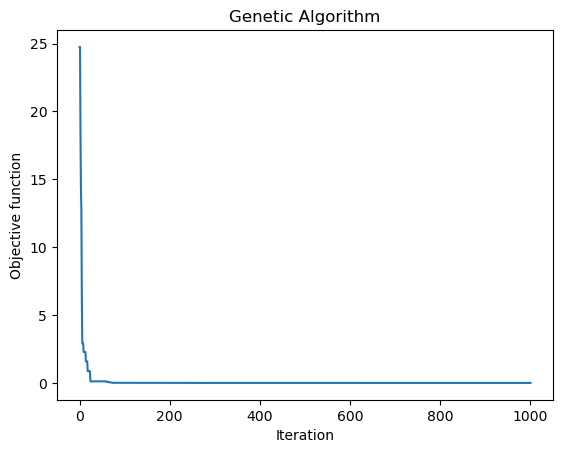

In [11]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return sphere_function(X)

varbound=np.array([[-10,10],[-10,10],[-10,10],[-10,10],[-10,10]])
vartype=np.array([['real'],['real'],['real'],['real'],['real']])

algorithm_param = {'max_num_iteration': 1000,
                   'population_size':100,
                   'mutation_probability':0.2,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.6,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

module = ga(function=f, dimension=5, variable_type_mixed=vartype, variable_boundaries=varbound,algorithm_parameters=algorithm_param,function_timeout=20.0)
                                               
module.run()
